In [60]:
import sqlite3 as sl
#from sklearn.neighbors import KernelDensity
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [61]:
dbfile = './web-application/database.db'
# Create a SQL connection to our SQLite database
con = sl.connect(dbfile)

# creating cursor
cur = con.cursor()
# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
# con.close()

[('users',), ('activeSessions',), ('messages',), ('psychologists',), ('psychologistSessions',), ('userConversations',), ('clicks',), ('playbacks',)]


In [62]:
userIds = [a[0] for a in cur.execute("SELECT * FROM clicks")]
timestamps = [a[1] for a in cur.execute("SELECT * FROM clicks")]
presses = [a for a in cur.execute("SELECT * FROM clicks")]
print(userIds)
print(timestamps)
datetime.strptime(timestamps[0], "%Y-%m-%dT%H:%M:%S.%fZ")


['b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503',

datetime.datetime(2024, 2, 29, 15, 22, 4, 810000)

In [63]:
# playbacks = [a[1] for a in cur.execute("SELECT * FROM playbacks")]
playbacks = [a for a in cur.execute("SELECT * FROM playbacks")]
print(playbacks)

[('1', '2024-02-29T15:20:40.290Z'), ('clipPlayer', '2024-03-01T20:23:51.956Z'), ('player2', '2024-03-01T20:23:53.323Z'), ('test-player', '2024-03-01T20:25:54.146Z'), ('player2', '2024-03-01T20:25:57.971Z'), ('clipPlayer', '2024-03-01T20:26:04.921Z'), ('clipPlayer', '2024-03-01T20:26:06.795Z'), ('test-player', '2024-03-01T20:27:43.025Z'), ('test-player', '2024-03-01T20:27:48.112Z'), ('player2', '2024-03-01T20:29:18.642Z'), ('test-player', '2024-03-01T20:32:00.157Z'), ('clipPlayer', '2024-03-01T20:32:03.491Z'), ('player2', '2024-03-01T20:32:06.892Z'), ('test-player', '2024-03-01T20:36:43.365Z'), ('player2', '2024-03-01T20:36:48.179Z'), ('clipPlayer', '2024-03-01T20:36:48.945Z'), ('test-player', '2024-03-01T20:36:50.483Z'), ('clipPlayer', '2024-03-01T20:36:51.304Z'), ('player5', '2024-03-01T20:38:39.711Z'), ('player7', '2024-03-01T20:38:43.493Z'), ('player19', '2024-03-01T20:38:48.692Z'), ('player18', '2024-03-01T20:38:50.308Z'), ('player19', '2024-03-01T20:38:51.614Z'), ('player18', '202

In [64]:
con.close()

In [65]:
datetime_objects = np.array([datetime.strptime(a, "%Y-%m-%dT%H:%M:%S.%fZ") for a in timestamps])
# Convert datetime objects to numerical values (e.g., timestamps)
numeric_values = np.array([dt.timestamp() for dt in datetime_objects])
datetimed_presses = []
for t in presses:
    datetimed_presses.append((t[0], datetime.strptime(t[1], "%Y-%m-%dT%H:%M:%S.%fZ")))
print(datetimed_presses)
datetimed_playbacks = []
for t in playbacks:
    datetimed_playbacks.append((t[0], datetime.strptime(t[1], "%Y-%m-%dT%H:%M:%S.%fZ")))
print(datetimed_playbacks)

[('b4d4e615-06fb-4b70-b9c1-a51dfe59818d', datetime.datetime(2024, 2, 29, 15, 22, 4, 810000)), ('f874fe92-b190-496e-b12e-f6d8395e9503', datetime.datetime(2024, 2, 29, 15, 22, 25, 99000)), ('b4d4e615-06fb-4b70-b9c1-a51dfe59818d', datetime.datetime(2024, 2, 29, 15, 22, 43, 84000)), ('f874fe92-b190-496e-b12e-f6d8395e9503', datetime.datetime(2024, 2, 29, 15, 23, 13, 337000)), ('b4d4e615-06fb-4b70-b9c1-a51dfe59818d', datetime.datetime(2024, 2, 29, 15, 23, 11, 759000)), ('ea43c33b-a737-474a-9389-b3b71564d3df', datetime.datetime(2024, 2, 29, 15, 23, 13, 408000)), ('f874fe92-b190-496e-b12e-f6d8395e9503', datetime.datetime(2024, 2, 29, 15, 23, 16, 59000)), ('ea43c33b-a737-474a-9389-b3b71564d3df', datetime.datetime(2024, 2, 29, 15, 23, 15, 552000)), ('f874fe92-b190-496e-b12e-f6d8395e9503', datetime.datetime(2024, 2, 29, 15, 23, 21, 583000)), ('ea43c33b-a737-474a-9389-b3b71564d3df', datetime.datetime(2024, 2, 29, 15, 23, 21, 387000)), ('f874fe92-b190-496e-b12e-f6d8395e9503', datetime.datetime(2024

In [68]:
# Remove very old data
cleaned_presses = []
for datetime_object in datetimed_presses:
    if datetime_object[1].day == 4:
        cleaned_presses.append(datetime_object)

cleaned_playbacks = []
for playback in datetimed_playbacks:
    if playback[1].day == 4 and playback[1].hour > 12:
        cleaned_playbacks.append(playback)

print(cleaned_presses)
print(cleaned_playbacks)

[('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 38, 279000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 39, 304000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 39, 683000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 39, 886000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 40, 997000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 41, 289000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 41, 568000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 42, 727000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 42, 860000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4, 13, 33, 42, 995000)), ('2fe4c6fe-9639-47e4-a43b-3071d7a79ceb', datetime.datetime(2024, 3, 4

In [70]:
group1ids = []
group2ids = []
group3ids = []
for push in cleaned_presses:
    time = push[1]
    if time.hour == 13 and (time.minute == 37 and time.second > 55) or (time.minute == 38 and time.second < 7):
        group1ids.append(push[0])
    if time.hour == 13 and time.minute == 38 and time.second > 7 and time.second < 17:
        group2ids.append(push[0])
    if time.hour == 13 and time.minute == 38 and time.second > 17 and time.second < 52:
        group3ids.append(push[0])
group1uniqueids = np.unique(np.array(group1ids))
group2uniqueids = np.unique(np.array(group2ids))
group3uniqueids = np.unique(np.array(group3ids))
print(group1uniqueids)
print(group2uniqueids)
print(group3uniqueids)

['0af8b246-7932-497b-8e4a-a0026acfeab6'
 '6e360cc1-e4fb-42e6-8473-c872479fb10a'
 'a0ea20a4-ddcd-4dc4-ae1d-c39f659a4ccc'
 'c23ca581-d6b4-483c-a6ed-e9a319b00b3f']
['5e50fb1f-9612-4144-aaf0-bb3d96734164'
 '71e955ab-307e-455f-b671-ba6b04b3a0a7'
 '7e16969c-380d-4f45-9eee-b58044c72dca'
 'aaf0ef53-bc69-478a-b263-f8a5073db117']
['2fe4c6fe-9639-47e4-a43b-3071d7a79ceb'
 '523a04ee-b335-488d-804e-ea8fc0fb30a0'
 '64a23a81-4dab-444d-8203-cac0654a36ee'
 'cf8d3d91-a739-478b-92fa-0cacdff18576']


In [7]:
# Varying kernel size using different bw_method values
bw_methods = ['scott', 0.01, 0.1, 1.0, 10.0]  # Different bandwidths

# Perform KDE
kde = gaussian_kde(numeric_values)

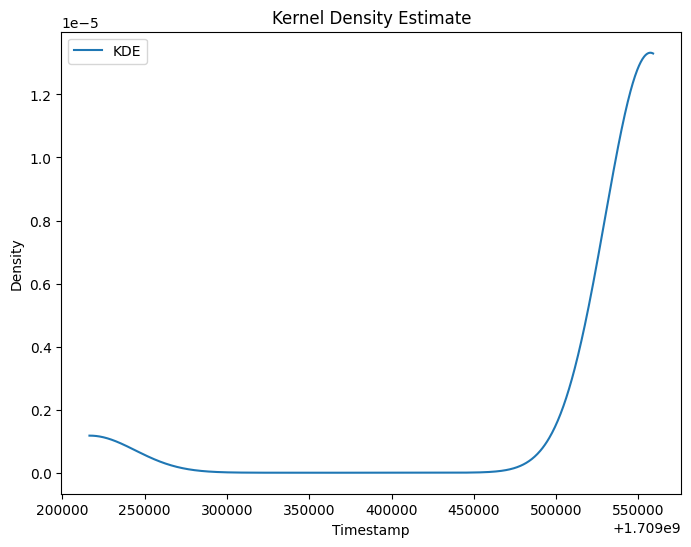

In [8]:
# Set up the range of values for which to estimate the density
x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)

# Evaluate the KDE at the specified points
density_estimate = kde(x_values)

# Plotting the KDE
plt.figure(figsize=(8, 6))
plt.plot(x_values, density_estimate, label='KDE')
plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()

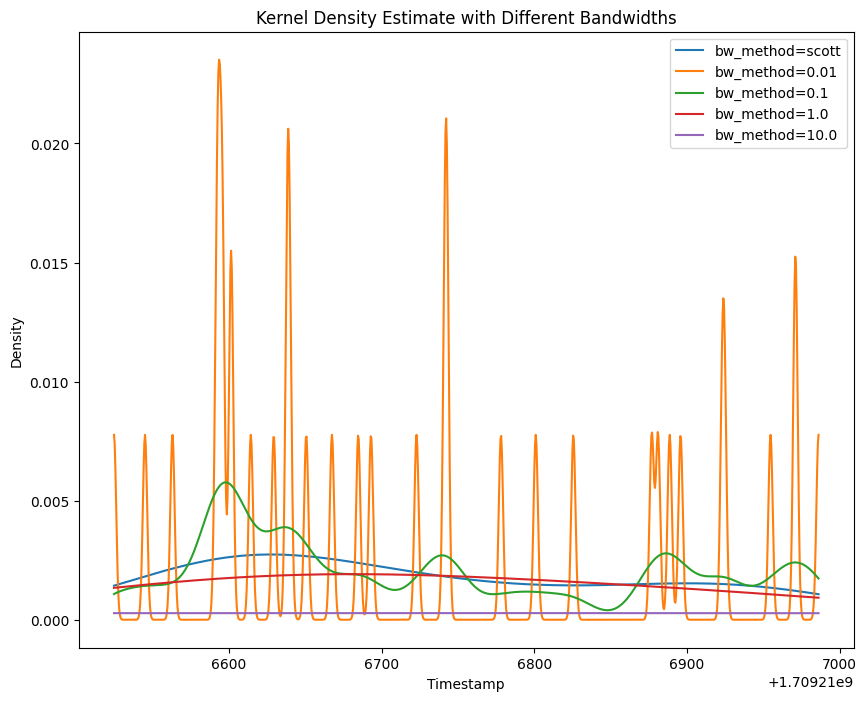

In [24]:
plt.figure(figsize=(10, 8))
for bw_method in bw_methods:
    kde = gaussian_kde(numeric_values, bw_method=bw_method)
    x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)
    density_estimate = kde(x_values)
    plt.plot(x_values, density_estimate, label=f'bw_method={bw_method}')

plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Different Bandwidths')
plt.legend()
plt.show()